# Load Imports

In [6]:
# imports
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
from PIL import Image
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import csv

# Loading the Data

In [7]:
# load the csv file
data = pd.read_csv("data\\UTKFaceAugmented.csv")

# seperate the targets (filenames)
target = ['age', 'filename']
target_data = data[target]

# seperate the features (load in all of them EXCEPT age_range)
#features = ['gender','race','num_haircuts_life','has_tiktok','remembers_disco','uses_skincare','max_annual_earnings']
features = ['num_haircuts_life','has_tiktok','remembers_disco','uses_skincare','max_annual_earnings']
features_data = data[features]
 

# Graphing the Data for Visual Aid

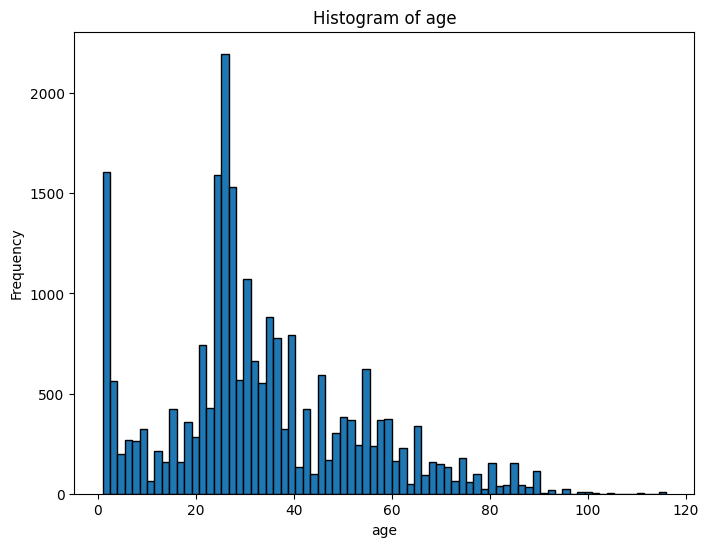

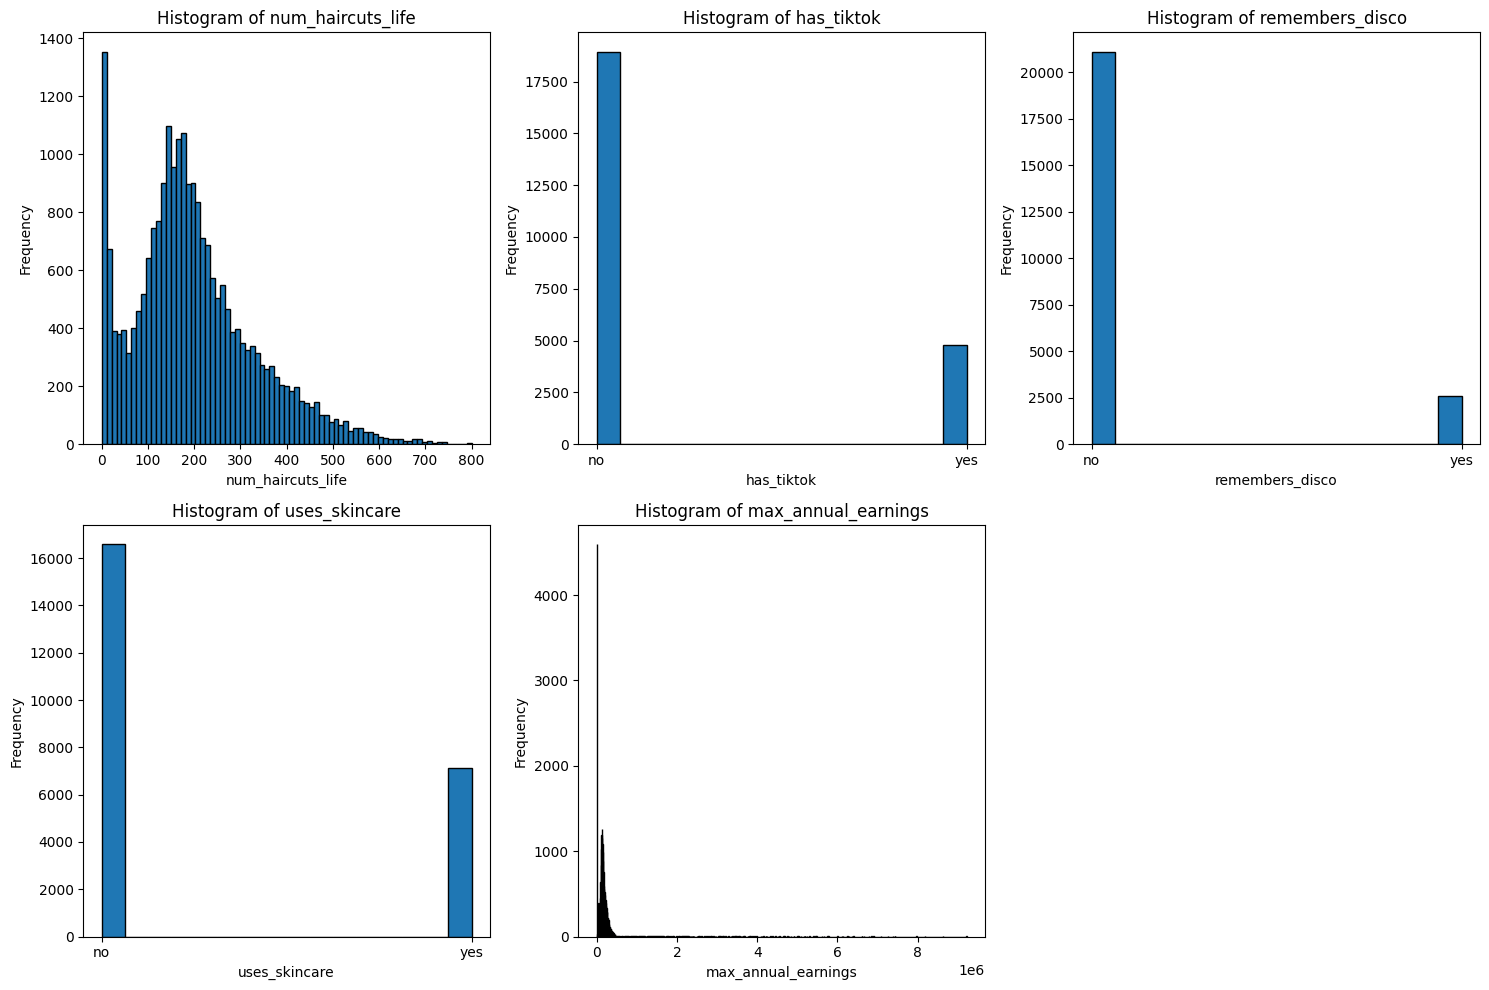

In [8]:
# Plot histogram for the target data (age)
plt.figure(figsize=(8, 6))
plt.hist(target_data['age'], bins='auto', edgecolor='black')
plt.title(f'Histogram of age')
plt.xlabel('age')
plt.ylabel('Frequency')
plt.show()

# Calculate the number of rows and columns for subplots
num_features = len(features)
num_cols = 3  # You can change the number of columns as needed
num_rows = math.ceil(num_features / num_cols)

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# Flatten the 2D array of subplots to simplify indexing
axes = axes.flatten()

# Iterate over features and plot histograms
for i, feature in enumerate(features):
    ax = axes[i]
    ax.hist(features_data[feature], bins='auto', edgecolor='black')
    ax.set_title(f'Histogram of {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')

# Remove empty subplots
for i in range(num_features, num_rows * num_cols):
    fig.delaxes(axes[i])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


# Preproccess Data 

In [10]:
# PREPROCESS features_data
haircuts_arr = features_data['num_haircuts_life']
earnings_arr = features_data['max_annual_earnings']

# One-hot encode 'race' and 'age_range'
#features_data = pd.get_dummies(features_data, columns=['race'], drop_first=True)

# One-hot encode 'gender', 'has_tiktok', 'remembers_disco', 'uses_skincare' (binary values)
# features_data = pd.get_dummies(features_data, columns=['gender', 'has_tiktok', 'remembers_disco', 'uses_skincare'], drop_first=True)
features_data = pd.get_dummies(features_data, columns=['has_tiktok', 'remembers_disco', 'uses_skincare'], drop_first=True)


# Calculate mean and std
mean_haircuts = np.mean(features_data['num_haircuts_life'], axis = 0)
std_haircuts = np.std(features_data['num_haircuts_life'], axis = 0)
mean_earnings = np.mean(features_data['max_annual_earnings'], axis = 0)
std_earnings = np.std(features_data['max_annual_earnings'], axis = 0)


# STANDARDIZE data
features_data['num_haircuts_life'] = (haircuts_arr - mean_haircuts)/std_haircuts
features_data['max_annual_earnings'] = (earnings_arr - mean_earnings)/std_earnings

# send data to preproccessed data to csv file
features_data.to_csv('data\\features_preprocessed.csv', index=False)
target_data.to_csv('data\\target_preprocessed.csv', index=False) # <---- Target values do not need standardization

Note: Images are not preprocessed here since, they will need to be loaded from disk. Therefore, images will be preprocessed on demand via the dataloader. Additonally, data splitting will take place during the training process.